In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [54]:
X

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [55]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Generated Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

# Fitting Model Before Using Call-Back

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=1)


Epoch 1/500
3/3 [==============================] - 0s 43ms/step - loss: 0.2908 - accuracy: 0.9375 - val_loss: 0.5996 - val_accuracy: 0.6500
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 0.2915 - accuracy: 0.9250 - val_loss: 0.5999 - val_accuracy: 0.6500
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 0.2894 - accuracy: 0.9250 - val_loss: 0.6010 - val_accuracy: 0.6500
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2896 - accuracy: 0.9250 - val_loss: 0.6037 - val_accuracy: 0.6500
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2899 - accuracy: 0.9250 - val_loss: 0.6072 - val_accuracy: 0.6500
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2901 - accuracy: 0.9250 - val_loss: 0.6076 - val_accuracy: 0.6500
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2890 - accuracy: 0.9250 - val_loss: 0.6081 - val_accuracy: 0.6500
Epoch 8/500
3/3 [===

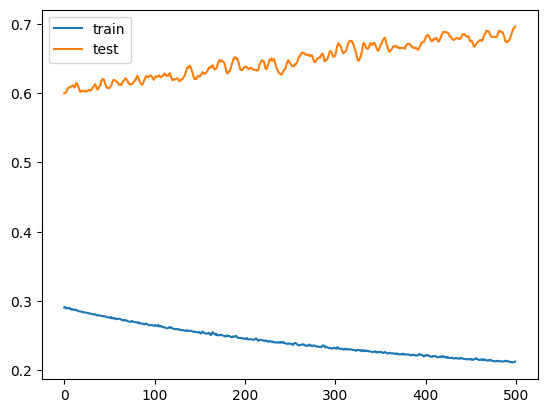

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


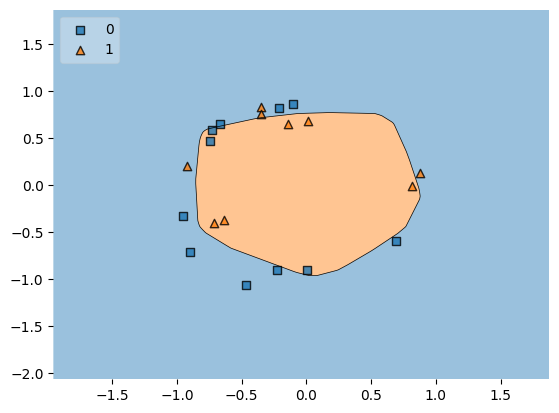

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Using and Visualizing Early-Stopping using Call-Back

In [40]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [50]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 42ms/step - loss: 0.5417 - accuracy: 0.8125 - val_loss: 0.6580 - val_accuracy: 0.6000
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.5384 - accuracy: 0.8125 - val_loss: 0.6560 - val_accuracy: 0.7000
Epoch 3/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.5369 - accuracy: 0.8375 - val_loss: 0.6539 - val_accuracy: 0.7000
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.5359 - accuracy: 0.8375 - val_loss: 0.6531 - val_accuracy: 0.7000
Epoch 5/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.5345 - accuracy: 0.8375 - val_loss: 0.6524 - val_accuracy: 0.7000
Epoch 6/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.5335 - accuracy: 0.8375 - val_loss: 0.6516 - val_accuracy: 0.6500
Epoch 7/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.5324 - accuracy: 0.8375 - val_loss: 0.6505 - val_accuracy: 0.6500
Epoch 8/3500


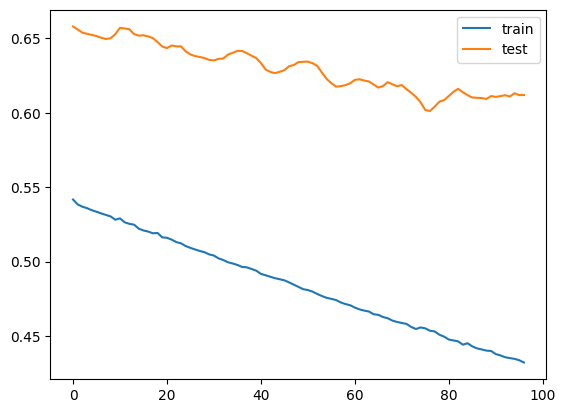

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


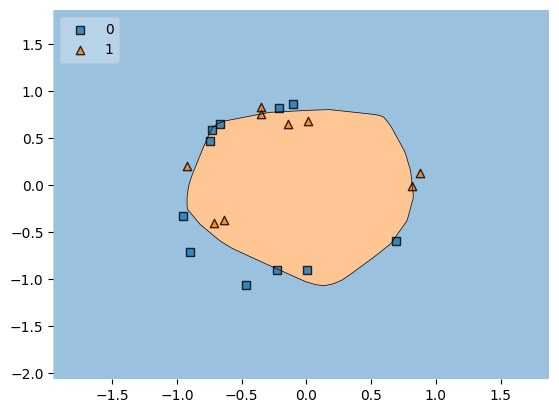

In [53]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()